<a href="https://colab.research.google.com/github/BrunoAzambuja/Churn_prediction_para_uma_empresa_de_telecomunicacoes/blob/main/Churn_prediction_para_uma_empresa_de_telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Prediction para uma empresa de Telecomunicações
#### Modelos de machine learning aplicados em taxa de evasão de clientes.

*by [Bruno Azambuja](www.brunoazambuja.com)*


# Churn Prediction

*Churn rate*, ou simplesmente *churn*, representa a taxa de evasão da sua base de clientes. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas.

<p align=center>
<img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/churnrate.jpg" width="90%"></p>

Ela é de extrema importância para a administração e sua análise ao longo do tempo pode mostrar que existe algum problema que deve ser atacado.

*Churn* também pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

Para mais informações sobre como o Churn prediction pode alavancar os resultados de um negócio, acesse este [*link*](https://tiinside.com.br/20/09/2015/churn-prediction-como-ele-pode-alavancar-seu-negocio/).

# Entendendo os objetivos

O objetivo deste projeto é desenvolver uma solução eficiente com *Machine Learning*, capaz de prever potenciais cancelamentos de clientes em uma empresa de telecomunicações, ou seja, desenvolver um modelo capaz de auxiliar na redução da taxa de evasão da sua base de clientes.

Além disso, veremos quais *insights* podem ser extraídos a partir de uma análise exploratória. 

# Instalando as bibliotecas

Primeiramente vamos instalar as bibliotecas e importar todos os pacotes necessários para este estudo.

In [ ]:
# instalando bibliotecas
!pip install scikit-plot -q
!pip install imbalanced-learn -q
!pip install pycaret -q

In [ ]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error

# Importando os dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

In [ ]:
# importando os dados para um dataframe
path = ('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = pd.read_csv(path)

# visualizando as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Com os dados importados para dentro de uma estrutura dataframe, pode-se iniciar uma análise exploratória dos dados a fim de buscar insights propostos inicialmente.

# Análise exploratória dos dados

Esta etapa foi dividida entre tópicos que visam tirar insights e elevar a consciência situacional a respeito do dataset de clientes de uma companhia de telecomunicações. Sendo assim, a análise exploratória tem por objetivo  permitir um entendimento de como os dados estão estruturados.

Este é um processo crítico que visa realizar investigações iniciais nos dados para descobrir padrões, detectar anomalias, testar hipóteses e verificar suposições com a ajuda de estatísticas resumidas e representações gráficas.

###**Características**

A fim de começar este projeto, irei verificar a integridade e usabilidade do dataset.

Com os dados importados, conseguimos fazer uma análise exploratória identificando suas principais caracteríscas, para que assim possamos preparar os dados para os modelos. 

Para isso, deixarei impresso as primeiras e últimas entradas de dados, os nomes das colunas, os tipos de variáveis por coluna, a quantidade de dados ausentes,  e os valores únicos por coluna. Essa última, especificamente, vai auxiliar na identificação de variáveis potencialmente categóricas.

In [ ]:
# vendo as primeiras e últimas entradas
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


A visualização das 5 primeiras e as 5 últimas entradas já permite entender como o dataset está composto. Mesmo que não haja uma definição sobre o significado dos nomes das features, é possível inferir, uma vez que a natureza das empresas de telecomunicações são parecidas.

Como se verifica acima, o dataset é composto de 7043 entradas e 21 variáveis.

In [ ]:
# checando as caracteriticas dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# checando os valores ausentes
df.isnull().sum().sort_values(ascending=False)

customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
OnlineBackup        0
gender              0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
Churn               0
dtype: int64

In [ ]:
# gerando a lista de valores únicos
print("Valores únicos (por coluna):\n{}\n".format(df.nunique()))

Valores únicos (por coluna):
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64



Neste primeiro momento podemos identificar alguma das principais características do *dataset*. Porém na próxima etapa, de preparação dos dados, onde iremos nos aprofundar mais nas características destes dados, iremos identificar quais são os dados que precisam de tratamento para que aí então possamos ajustá-los.

Para a etapa atual, de análise exploratória, vamos seguir explorando as características destes dados e identificando os insights de negócio que podemos extrair destes dados.

###**Balanceamento**

Por fim, nesta análise exploratória, vamos ver o balanceamento das classes do dataset. Para identificar se os nossos dados podem estar com algum tipo de bias (viés) e tirar alguns insights do negócio.

**Balanceamento do dataset dos clientes: Churn**

Abaixo podemos verificar o balanceamento dos dados com relação à *feature* `Churn`. Estes dados nos mostram a frequência em que ocorre casos onde a situação de Churn é positiva ou negativa para cada clientes deste *dataset*.

É possível identificar que a classe *No* ocorre com frequência muito superior à classe *Yes*. Isso será considerado na etapa de construção do modelo de machine learning.

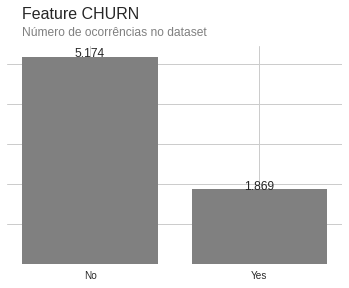

In [ ]:
# gerando dataset
sex_count = df['Churn'].value_counts(dropna = False)

# gerando o gráfico
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(sex_count.index, sex_count.values, data=sex_count, color = "gray")
plt.title("Feature CHURN", fontsize=16, x=0.045, y=1.1, loc="left")
plt.suptitle("Número de ocorrências no dataset", color = "gray", fontsize=12, x=0.16, y=0.95, ha="left")
ax.ticklabel_format(style='plain', axis='y')

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False) 
for pos in ['right', 'top', 'left', 'bottom']: 
    plt.gca().spines[pos].set_visible(False)

#colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height(),
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center')

#plotado gráfico
plt.show()

**Balanceamento do dataset dos clientes: Gênero**


Irei verificar a contagem de valores para a feature `gender`, no caso identificar quantos *Male* e *Female* estão contidos no *dataset*.

Apesar de não entender se que isso poderia gerar algum prejuízo relevante neste problema específico, haverá muitas situações onde esse prejuízo será real, como é o caso de modelos aplicados à contratação de funcionários ou previsão de crimes.

Abaixo, você pode ver que o gênero das entradas está balanceado:

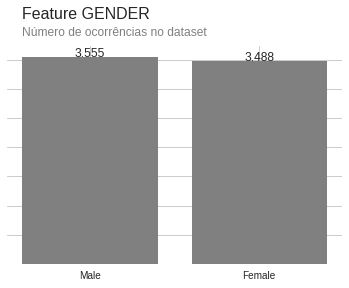

In [ ]:
# gerando dataset
sex_count = df['gender'].value_counts(dropna = False)

# gerando o gráfico
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(sex_count.index, sex_count.values, data=sex_count, color = "gray")
plt.title("Feature GENDER", fontsize=16, x=0.045, y=1.1, loc="left")
plt.suptitle("Número de ocorrências no dataset", color = "gray", fontsize=12, x=0.16, y=0.95, ha="left")
ax.ticklabel_format(style='plain', axis='y')

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False) 
for pos in ['right', 'top', 'left', 'bottom']: 
    plt.gca().spines[pos].set_visible(False)

#colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height(),
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center')

#plotado gráfico
plt.show()

**Balanceamento do dataset dos clientes: Serviços de telefone contratados**

Agora iremos visualizar o balanceamento dos dados relacionados aos serviços contratados pelos clientes e ofertados pela empresa de telecomunicação.

Abaixo podemos verificar o balanceamento dos dados com relação à *feature* `PhoneService`. Estes dados nos mostram a frequência em que ocorre casos onde a situação de PhoneService é positiva ou negativa para cada clientes deste *dataset*.

É possível identificar que a classe *Yes* ocorre com frequência muito superior à classe *No*:

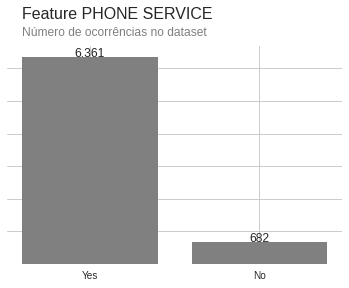

In [ ]:
# gerando dataset
sex_count = df['PhoneService'].value_counts(dropna = False)

# gerando o gráfico
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(sex_count.index, sex_count.values, data=sex_count, color = "gray")
plt.title("Feature PHONE SERVICE", fontsize=16, x=0.045, y=1.1, loc="left")
plt.suptitle("Número de ocorrências no dataset", color = "gray", fontsize=12, x=0.16, y=0.95, ha="left")
ax.ticklabel_format(style='plain', axis='y')

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False) 
for pos in ['right', 'top', 'left', 'bottom']: 
    plt.gca().spines[pos].set_visible(False)

#colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height(),
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center')

#plotado gráfico
plt.show()

**Balanceamento do dataset dos clientes: Serviços de internet contratados**

Abaixo podemos verificar o balanceamento dos dados com relação à *feature* `InternetService`. Estes dados nos mostram a frequência em que ocorre casos onde a situação de InternetService é negativa para cada clientes deste *dataset*, assim como em casos onde há serviço de fibra ótica e DSL.

É possível identificar que há diferenças entre as classes, aqui também podemos identificar a necessidade de tratamento de dados desta *feature*:

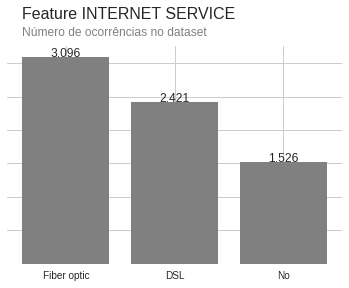

In [ ]:
# gerando dataset
sex_count = df['InternetService'].value_counts(dropna = False)

# gerando o gráfico
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(sex_count.index, sex_count.values, data=sex_count, color = "gray")
plt.title("Feature INTERNET SERVICE", fontsize=16, x=0.045, y=1.1, loc="left")
plt.suptitle("Número de ocorrências no dataset", color = "gray", fontsize=12, x=0.16, y=0.95, ha="left")
ax.ticklabel_format(style='plain', axis='y')

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False) 
for pos in ['right', 'top', 'left', 'bottom']: 
    plt.gca().spines[pos].set_visible(False)

#colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height(),
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center')

#plotado gráfico
plt.show()

###**Distribuições**

Por fim, agora vamos ver a distribuição das classes do dataset. Para identificar se os nossos dados podem estar com algum tipo de bias (viés) e tirar alguns insights do negócio.

Apesar deste dataset ser composto majoritariamente por variáveis binárias ou categóricas, é possível ver abaixio, pelo método `describe`, que não há indícios da presença de outliers.

In [ ]:
# gerando dados numéricos das features
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Analisando o boxplot para a *feature* `MonthlyCharges`, perceba como a distribuição dos valores reforça essa hipótese. O threshold padrão não acusou nenhum plot fora dos limites superior e inferior.

 Conforme podemos supor a *feature* `MonthlyCharges` representa os valores de cobrança mensal dos clientes.

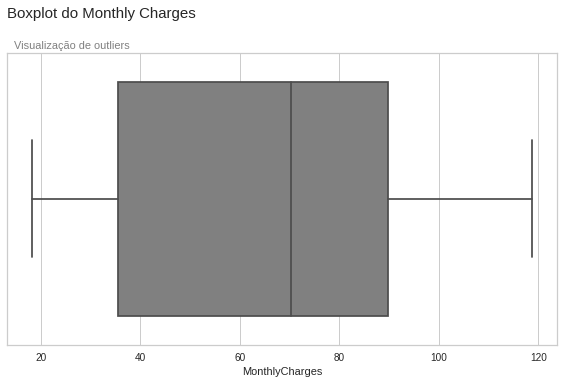

In [ ]:
# gerando o gráfico
sns.boxplot(x=df["MonthlyCharges"], color = "gray")

# adicionando títulos
plt.title("Boxplot do Monthly Charges", fontsize=15, x=0, y=1.1, loc="left")
plt.suptitle("Visualização de outliers", color = "gray", fontsize=11, x=0.035, y=0.88, ha="left");

# plotando o gráfico
plt.tight_layout()

Outra análise importante à ser feita é sobre a variável `tenure`, ela está relacionada ao tempo que um cliente permance assinando determinado serviço. Em outras palavras, pode-se dizer que é um indicativo de fidelidade. Apesar de não haver nenhuma documentação, podemos assumir que a unidade de tempo utilizada é "mês":

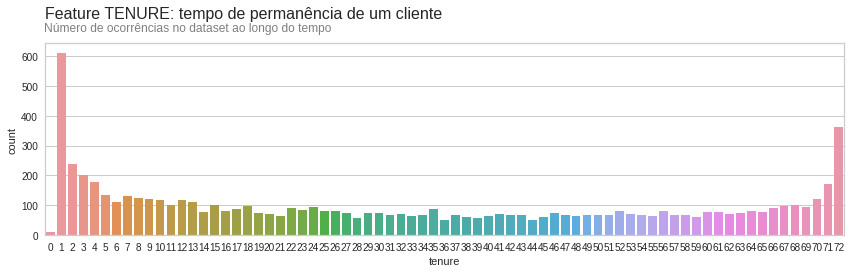

In [ ]:
# gerando figura
fig, ax = plt.subplots(figsize=(12, 4))

# gerando o gráfico
sns.countplot(df['tenure'])

plt.title("Feature TENURE: tempo de permanência de um cliente", fontsize=16, x=0.0, y=1.1, loc="left")
plt.suptitle("Número de ocorrências no dataset ao longo do tempo", color = "gray", fontsize=12, x=0.058, y=0.89, ha="left")

# plotando o gráfico
plt.tight_layout()

Os análise de distribuição importante à ser feita é dos dados dos clientes que apresentam `Churn` *Yes* ou *No* e relacioná-los aos valores de `Monthly charges` com `tenure`.

Como podemos ver não há um padrão de influência significativo sobre a distribuição entre os dados de `tenure`, de `MonthlyCharges` e o `Churn`:

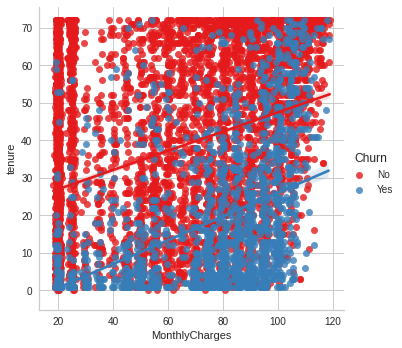

In [ ]:
# gerando os gráfico
ax = sns.lmplot(x = 'MonthlyCharges', y = 'tenure', data=df, hue='Churn', palette='Set1')

Pelo o que podemos ver, o gráfico abaixo nos mostra que os dados estão distribuídos de forma homogênea, indicando que as features `tenue` e a `MonthlyCharges` não apresentam uma tendência comportamental, ou seja, os valores mensais não indicam influência sobre tempo que um cliente permance assinando determinado serviço:

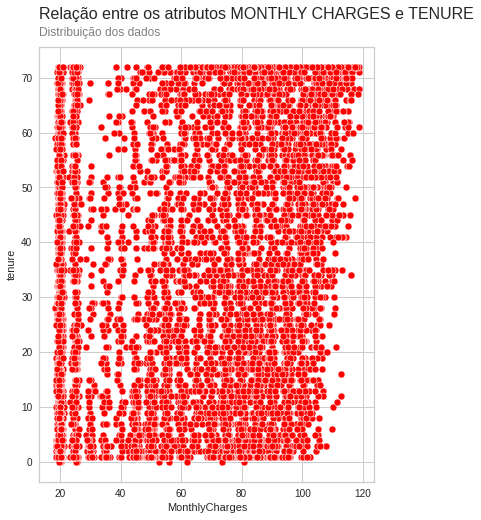

In [ ]:
# gerando o gráfico
plt.figure(figsize=(6,8))
sns.scatterplot(x = 'MonthlyCharges' ,y = 'tenure', data = df, color = 'red')
plt.title("Relação entre os atributos MONTHLY CHARGES e TENURE", fontsize=16, x=0, y=1.05, loc="left")
plt.suptitle("Distribuição dos dados", color = "gray", fontsize=12, x=0.125, y=0.915, ha="left");
plt.show()

###**Correlações**

**Correlação** significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis. 

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação;
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`.

Este foi o critério utilizado como base para avaliarmos o nível de correlação entre as variáveis.

<center><img alt="pearson" width="30%" src="http://3.bp.blogspot.com/_HqjPVvZ1cRI/R_O_zshrecI/AAAAAAAABOQ/oMLkaCX5l7c/s400/corel-interpretacao.gif"></center>

Primeiramente criei uma matriz que demonstra a correlação entre as variáveis definidas:

In [ ]:
# criar uma matriz de correlação
corr = df.corr()

# mostrar a matriz de correlação
display(corr)

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


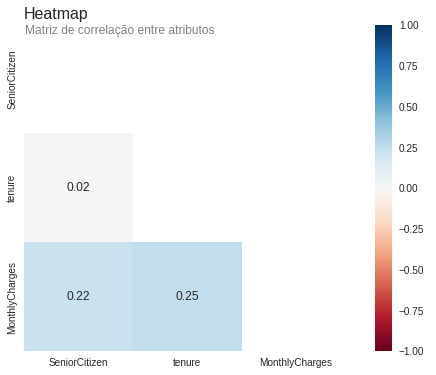

In [ ]:
# plotar um heatmap a partir das correlações
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# definindo parâmetros
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 6))
    ax = sns.heatmap(corr, cmap='RdBu', fmt='.2f', mask=mask, vmax=1, vmin=-1, square=True, annot=True)

# adicionando títulos
plt.title("Heatmap", fontsize=16, x=0, y=1.5, loc="left")
plt.suptitle("Matriz de correlação entre atributos", color = "gray", fontsize=12, x=0.243, y=0.88, ha="left");

Conforme podemos ver, a matriz de correlação acima indica que a maior correlação encontrada a respeito da variável alvo foi de 0.25, o que é uma correlação fraca positiva entre o `MonthlyCharges`e o `tenue`. Os demais atributos também indicaram correlações fracas e positivas.

Um ponto muito importante à se destacar é que como o *dataframe* apresenta somente 3 *features* com dados numéricos, somente eles estão contemplados nesta matrix de correlação. Conforme poderemos ver na próxima etapa, as demais *features* passarão pelo processo conhecido como *feature engineering*, assim estes dados poderão ser incluídos no modelo de prediction, conforme o objetivo proposto deste estudo.

Além disso, na etapa de construção do modelo será realizado uma análise chamada *feature importances*. Essa visualização basicamente nos mostra qual a importância de cada uma das variáveis para o resultado do modelo.

# Preparando os dados

Esta etapa consiste em preparar nosso conjunto de dados para a construção do modelo. Nesta seção, executaremos as seguintes etapas de tratamento dos dados:

* Limpeza dos dados:
  * Preencher ou eliminar as linhas com valores faltantes;
  * Eliminar valores duplicados;
  * Tratar ou remover outliers.
* *Feature Engineering*:
  * Discretizar variáveis contínuas;
  * Decompor *features* categóricas;
  * Aplicar transformações às variáveis;
  * Agregar *features* para gerar novas.
* Seleção dos atributos:
  * Eliminar os *features* (atributos) que não contêm informações úteis.
* *Spliting data*:
  * Dividir o conjunto de dados entre dados de treinamento e teste.

Primeiramente vamos gerar um novo *dataframe* onde será aplicado todo tratamento proposto.

In [ ]:
# gerando dataframe
df_clean = df.copy()

###**Limpeza dos dados**

Nesta etapa serão realizadas algumas verificações para identificar possíveis dados discrepantes e para que assim possamos ajustá-los.

**Valores ausentes**

Na função abaixo, conseguimos verificar que não há valores ausentes neste *dataframe*.

In [ ]:
# checando os valores ausentes
df_clean.isnull().sum().sort_values(ascending=False)

customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
OnlineBackup        0
gender              0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
Churn               0
dtype: int64

Quanto à qualidade do dataset, este não apresentou valores ausentes nas suas respectivas colunas.

**Valores duplicados**

Esta é uma etapa importante à ser verificada para reduzirmos os ruídos neste tipo de trabalho.

In [ ]:
# verificando a existência de dados duplicados
duplicated = df_clean[df_clean.duplicated().values]
duplicated

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Como podemos observar o *dataset* não apresentou dados duplicados, desta forma o podemos seguir para próxima etapa conecida como *feature engineering*.

###**Seleção de atributos**

Com a limpeza dos dados, podemos fazer a seleção dos atributos que serão interessantes mantermos.

Para esse estudo vamos excluir a coluna `customerID`, pois ela será desnecessária ao longo de todo este projeto.

In [ ]:
# removendo a coluna costumerID
df_clean.drop("customerID", axis=1, inplace=True)

# verificando a alteração
df_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###**Feature Engineering**

Veja algumas observações que merecem destaque, observadas nea fase inicial, da análise exploratória:

* A coluna `costumerID` não agrega nenhuma informação, pois se trata de um identificador única para cada cliente.
* A variável alvo está na coluna `Churn`, indicando a situação de churn.
* A coluna `TotalCharges` deveria ser um `float`, mas está como `object`.
    * Como iremos ver mais à frente, apesar de não termos detectado nenhum valor ausente, existem algumas strings que representam sim valores ausentes.
* Várias features precisam ser codificadas para valores numéricos.
    * Há várias features binárias, incluindo nossa variável alvo, ou com múltiplos valores, cada um representando uma categoria.


In [ ]:
# verificando dataset
df_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# descrevendo as características do dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


**Aplicando transformação das variáveis**

Como podemos ver abaixo quando tentamos converter as strings da coluna `TotalCharges`, acabamos identificando um erro.

O que aconteceu na verdade, foi que os supostos dados ausentes foram lançados como a string `""`. Quando tentamos `float("")`, o interpretador retorna um erro.

Assim, para consegur converter adequadamente, criei uma função para lidiar com essa exceção. Ao final, identifiquei que dados ausentes foram encontrados, e substitui pelo valor da mediana da coluna.

In [ ]:
# # convertendo a coluna TotalCharges para float
# df_clean["TotalCharges"].astype('float32')

Como podemos observar, na execução da operação acima, não conseguimos converter os dados pois ele gera um erro de execução. Desta forma, gerei uma função que detecta estes erros e preenche o *dataset* com valores *NaN*.


In [ ]:
# função que detecta erro de preenchimento e transforma os dados
def converter_str_float(entrada):
    """
    Converte um objeto do tipo string em float.

    # Arguments
        entrada: string, string da coluna TotalCharges.

    # Returns
        Valor convertido em float, caso permita a conversão.
        NaN, caso o valor não seja apropriado.
    """

    try:
        return float(entrada)
    except ValueError:
        return np.nan
        
# converter as strings de TotalCharges para float
df_clean["TotalCharges"] = df_clean["TotalCharges"].apply(converter_str_float)

In [ ]:
# checando os valores ausentes
df_clean.isnull().sum().sort_values(ascending=False)

TotalCharges        11
gender               0
SeniorCitizen        0
MonthlyCharges       0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
DeviceProtection     0
OnlineBackup         0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
tenure               0
Dependents           0
Partner              0
Churn                0
dtype: int64

Após a identificação do erro e correção, conseguimos fazer a substituição dos dados ausentes pela mediana desta *feature*. Podemos ver essa transformação na função abaixo:

In [ ]:
# substituindo os dados ausentes pelo valor da mediana
TotalChargesMedian = df_clean.TotalCharges.median()
df_clean["TotalCharges"].fillna(TotalChargesMedian, inplace=True)

Com o erro corrigido, agora iremos fazer a transformação desta variável:

In [ ]:
# convertendo as strings de TotalCharges para float
df_clean["TotalCharges"] = df_clean["TotalCharges"].apply(converter_str_float)

Como podemos ver, a transformação da variável foi concluída conforme proposto inicialmente.

**Gerando features categóricas**

O tratamento de variáveis categóricas consiste em transformar dados categóricos em um conjunto de dados em dados numéricos. É essencial que executemos a codificação de recursos porque a maioria dos modelos de *machine learning* só pode interpretar dados numéricos e não dados em forma de texto.

Primeiramente irei buscar os valores únicos por coluna, especificamente isso vai auxiliar na identificação das variáveis potencialmente categóricas. Para mais informações quanto ao tratamento de variáveis categórias, acesse este artigo que elaborei para o [Medium](https://medium.com/@brunoazambuja_78996/feature-engineering-lidando-com-vari%C3%A1veis-categ%C3%B3ricas-1335c37ace5b).

In [ ]:
# gerando a lista de valores únicos
print("Valores únicos (por coluna):\n{}\n".format(df_clean.nunique()))

Valores únicos (por coluna):
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64



In [ ]:
# verificando os valores únicos das variáveis object
np.unique(df_clean.select_dtypes('object').values)

array(['Bank transfer (automatic)', 'Credit card (automatic)', 'DSL',
       'Electronic check', 'Female', 'Fiber optic', 'Mailed check',
       'Male', 'Month-to-month', 'No', 'No internet service',
       'No phone service', 'One year', 'Two year', 'Yes'], dtype=object)

Nesta etapa de *features* categóricas, será realizado um pré-processamento básico, apenas com a finalidade de construir um modelo base. 

As features que continham 2 labels únicos, serão processadas usando-se o `LabelEncoder`. Vale lembrar que isso inclui a variável alvo `Churn`. Na sequência, serão separadas as variáveis numéricas das categóricas. As categóricas serão transformadas em variáveis dummy, para permitir a sua utilização em todos os modelos.

In [ ]:
# pré processando as variáveis
binary_var = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
num_var = [col for col in df_clean.select_dtypes(['int', 'float']).columns.tolist() if col not in binary_var]
cat_var = [col for col in df_clean.columns.tolist() if col not in binary_var + num_var]

# Label Encoding para as variáveis Binárias
le = LabelEncoder()
for i in binary_var:
    df_clean[i] = le.fit_transform(df_clean[i])

# Encoding para colunas categóricas com múltiplas classes
df_clean = pd.get_dummies(df_clean, columns=cat_var)

# verificando as 5 primeiras e últimas entradas do novo dataframe
df_clean

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,306.60,1,...,1,0,0,1,0,0,0,0,0,1


Demais transformações de *Feature Engineering* propostas inicialmente não são necessárias.

In [ ]:
# verificando os valores únicos das variáveis categóricas
np.unique(df_clean.select_dtypes('object').values)

array([], dtype=float64)

In [ ]:
# checando as caracteriticas dos dados
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   float64
 9   Churn                                    7043 non-null   int64  
 10  MultipleLines_No                         7043 no

In [ ]:
# gerando a lista de valores únicos
print("Valores únicos (por coluna):\n{}\n".format(df_clean.nunique()))

Valores únicos (por coluna):
gender                                        2
SeniorCitizen                                 2
Partner                                       2
Dependents                                    2
tenure                                       73
PhoneService                                  2
PaperlessBilling                              2
MonthlyCharges                             1585
TotalCharges                               6531
Churn                                         2
MultipleLines_No                              2
MultipleLines_No phone service                2
MultipleLines_Yes                             2
InternetService_DSL                           2
InternetService_Fiber optic                   2
InternetService_No                            2
OnlineSecurity_No                             2
OnlineSecurity_No internet service            2
OnlineSecurity_Yes                            2
OnlineBackup_No                               2
OnlineBacku

Como podemo observar acima, todas as features do *dataframe* estão ajustadas e respeitando o critério categórico proposto incialmente.

Com esta etapa concluída podemos ir para próxima etapa de preparação dos dados para o modelo de *machine learning*.

###**Spliting data**

Lembre-se que os dados de teste não podem ser usados para treinar o modelo. Quando estivermos com nosso modelo pronto, aí sim, usaremos o modelo de teste para fazer previsões. Com isso, vamos separar os dados entre X e Y como entre treino e test aplicando a técnica conhecida como `split`.

In [ ]:
# separando a feature matrix da target vector
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']

# dividindo os dados entre treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [ ]:
# verificando o formato dos conjuntos
print("Formato dataset orginal", df_clean.shape)
print("Formato dataset de treino", X.shape)
print("Formato dataset de teste", y.shape)

Formato dataset orginal (7043, 41)
Formato dataset de treino (7043, 40)
Formato dataset de teste (7043,)


# Modelos de Machine Learning

Em python existem algumas bibliotecas de *Machine learning* como Scikit-Learn, Keras ou TensorFlow, neste estudo usaremos o [Scikit-Learn](https://scikit-learn.org/stable/) para desenvolver os modelos de classificação como mecanismo de previsão de Churn.

Com o tratamento aplicado sobre os dados na etapa anterior, já podemos usar o novo *dataframe* nos modelos de *machine learning*.

###**Cross Validation**

O objetivo desta etapa é desenvolver uma função que gera o modelo de *machine learning* aplicando também a técnica conhecida como *cross validation*.

O `cross_val_score` é uma técnica usada para avaliar como a análise estatística se generaliza para um conjunto de dados independente. Essa técnica avalia modelos de *machine learning*, treinando vários modelos em subconjuntos dos dados de entrada disponíveis e avaliando-os no subconjunto complementar dos dados. Neste [*link*](https://towardsdatascience.com/cross-validation-430d9a5fee22) é possível acessar mais informações sobre esta técnica.

In [ ]:
def val_model(X, y, clf, quite=False):
   
    X = np.array(X)
    y = np.array(y)

    model = clf
    scores = cross_val_score(model, X, y, scoring='recall')

    if quite == False:
        print("Recall: {:.3f} (+/- {:.2f})".format(scores.mean(), scores.std()))
    
    return scores.mean()

Estas funções realizam os cross-validation com os dados de treino para determinado modelo.

Os argumentos são:
* X: DataFrame, contém as variáveis independetes.
* y: Series, vetor contendo a variável alvo.
* clf: modelo classificador do Scikit-learn.
* quite: bool, indicando se a função deve imprimir os resultados ou não.

Retorna:
* float, média dos scores da cross-validation.

###**Base Line**

Para podermos comparar o desempenho assim como melhorar os demais modelos, criaremos um baseline simples, não será feito nenhum ajuste nos hiperparâmetros, porém será aplicado técnicas de *cross validation* definida na etapa anterior.

Para o baseline inicial, usei o modelo classificador *Decision Tree Regressor*, os dados aplicados neste modelo foram os de treino.

Sendo assim, um modelo de *Machine Learning* deve ser quantificável, seja em termos de desempenho ou precisão. Na sequência, vamos testar o desempenho do modelo sobre o nosso conjunto de dados usando a métrica abaixo:

* ***Recall -*** Ela indica o quanto nosso modelo está identificando os casos positivos corretamente. Recall é bastante útil quando precisamos minimizar os falsos negativos, ele nos dá informações sobre falsos negativos. Isso é especialmente útil para casos de diagnósticos, onde pode haver um dano muito maior em não identificar uma doença, do que identificá-la em pacientes saudáveis. Sempre que precisarmos minimizar os falsos negativos devemos buscar uma maior pontuação nessa métrica.

In [ ]:
# criando a baseline e gerando o desempenho do modelo
rf = RandomForestClassifier()
score_baseline = val_model(X_train, y_train, rf)

Recall: 0.488 (+/- 0.01)


Como podemos ver, este modelo está indicando o quanto o nosso modelo está identificando os casos positivos corretamente.

###**Scaling**

Nesta etapa também apliquei uma técnica conhecida como *Scaling*, esta técnica tem como objetivo ajustar a magnitude dos diferentes *featuring*. Para implementarmos as técnicas de *Scaling* podemos aplicar tanto a Normalização com o `MinMaxScaler()` como a Padronização com o `StandardScaler()`, estas são as duas técnicas de dimensionamento de recursos mais importantes e comumente utilizada. 

A Normalização normalmente significa redimensionar os valores em um intervalo de [0,1], já a Padronização normalmente significa redimensionar os dados para ter uma média de 0 e um desvio padrão de 1 (variância unitária). Neste [*link*](https://towardsdatascience.com/normalization-vs-standardization-cb8fe15082eb) é possível acessar mais informações desta técnica.

In [ ]:
# # normalizando os dados
# scaler = MinMaxScaler().fit(X_train)
# X_train = scaler.transform(X_train)

# # desempenho do modelo dados normalizados
# rf = RandomForestClassifier()
# score_baseline = val_model(X_train, y_train, rf)

Recall: 0.485 (+/- 0.01)


In [ ]:
# padronizando os dados
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# desempenho do modelo dados padronizado
rf = RandomForestClassifier()
score_baseline = val_model(X_train, y_train, rf)

Recall: 0.494 (+/- 0.01)


Acima podemos ver, que o modelo de scaling que apresentou melhor desempenho foi do tipo padronizado, sendo assim iremos aplicar esta técnica sobre os dados dos próximos modelos.

###**Balanceamento do modelo**

Uma vez que temos um baseline para comparar se os ajustes melhoram ou pioram o desempenho do modelo, irei realizar o balanceamento dos dados e ver como isso irá impactar.

As técnicas escolhidas foram Under Sampling e Over Sampling, após alguns teste de desempenho das outras. Seguindo recomendações de algumas literaturas, os dados serão padronizados antes de usar essa técnica de balanceamento.

Lembrando, é importante que o balanceamento aconteca apenas com os dados de treino. Os dados de teste devem permanecer intocáveis.

In [ ]:
# # undersample
# rus = RandomUnderSampler()
# X_train, y_train = rus.fit_resample(X_train, y_train)

# # desempenho do modelo dados undersample
# rf = RandomForestClassifier()
# score_baseline = val_model(X_train, y_train, rf)

Recall: 0.744 (+/- 0.01)


In [ ]:
# oversample
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

# desempenho do modelo dados oversample
rf = RandomForestClassifier()
score_baseline = val_model(X_train, y_train, rf)

Recall: 0.862 (+/- 0.13)


###**Comparação de modelos**


Para este estudo, na primeira etapa, chamada de comparação de modelos, foi obtida o *Recall* de todos os modelos indicados inicialmente.

Na etapa seguinte, após a identificação do modelo que apresentou o melhor desempenho de acurácia, foi aplicada uma otimização de hiperparâmetros a fim de buscar uma melhoria em sua perfomance.

Por fim, na etapa de avaliação de desempenho, o modelo otimizado foi aplicado  sobre o dataset chamado `test`, a fim de avaliar o desempenho deste modelo ajustado, tanto na condição sem *scaling*, como normalizado e padronizado. Na sequência foram identificadas as *features importances* deste modelo.

O objetivo desta etapa é avaliarmos diversos modelos de *machine learning*, identificando qual modelo apresenta a melhor performance sobre os dados.

Agora irei aplicar a validação cruzada a vários modelos a fim de identificar o seu desempenho e escolher o(s) melhor(es). Novamente, serão utilizados apenas dados de treino.

Estes são os algoritmos escolhidos no desenvolvimento para este estudo:

* Random Forest;
* Decision Tree;
* Stochastic Gradient Descent;
* SVC;
* Regressão Logística;
* LightGBM.

In [ ]:
# instanciando os modelos
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

# definindo variáveis
model = []
recall = []

# treinando o modelo e gerando os respectivos recall
for clf in (rf, dt, sgdc, svc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    recall.append(val_model(X_train, y_train, clf, quite=True))

pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
RandomForestClassifier,0.860564
DecisionTreeClassifier,0.788526
SGDClassifier,0.785589
SVC,0.834764
LogisticRegression,0.821737
XGBClassifier,0.851658
LGBMClassifier,0.835286


**Escolha do modelo**

Dadas as características do problema e o desempenho durante as execuções anteriores, optei pelo XGBoost, apresentando resultado bem próximo ao da Regressão Logística.

Meu entendimento é que o tuning dos parâmetros pode melhorar ainda mais a qualidade da solução. Como temos poucos ajustes possíveis na Regressão Logística, não acredito que o resultado poderia passar o XGBoost.

###**Otimização de hiperparâmetros**

Um hiperparâmetro é um tipo de parâmetro, externo ao modelo, definido antes do início do processo de aprendizagem. É ajustável e pode afetar diretamente o desempenho de um modelo.

Antes disso, devemos avaliar quais parâmetros podemos ajustar ao trabalhar com o XGBoost. Podemos encontrar a lista completa [aqui](https://xgboost.readthedocs.io/en/latest/parameter.html), ou podemos utilizar o método `get_params` para visualizar parâmetros que podem ser otimizados para obtermos os melhores resultados. Para mais referência em relação ao tuning de hiperparâmetros do XGBoost, acesse esse [link](https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663).

In [ ]:
# instanciando o modelo
xgb = XGBClassifier(learning_rate=0.1)

# verificando os parâmetros
xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

Na segunda etapa para se encontrar os melhores hiperparâmetros aplicamos um algoritmo de otimização chamado *XGBoost*. Como o *XGBoost* está disponível de uma maneira compatível com o *Scikit-learn*, podemos trabalhar com as funções do otimizador de hiperparâmetros da biblioteca *Scikit-learn*.

As duas técnicas de otimização dos hiperparâmnetros mais comuns são o *Grid Search* e o *Random Search*, para este estudo utilizaremos os *Grid Search*. 

Este otimizador de hiperparâmetros é uma pesquisa exaustiva sobre cada combinação de valores de parâmetros especificados. Acesse este [*link*](https://www.projectpro.io/recipes/find-optimal-parameters-using-gridsearchcv) para mais informação sobre o *Grid Search*. 

Os parâmetros do *Grid Search* escolhido para este estudo foram:

* `estimator`: Nisso temos que passar os modelos ou funções em que queremos usar GridSearchCV;

* `param_grid`: Dicionário ou lista de parâmetros de modelos ou função em que GridSearchCV tem que selecionar o melhor;

* `Scoring`: É usado como uma métrica de avaliação para o desempenho do modelo para decidir os melhores hiperparâmetros, se não for eespecificado, ele usa o escore do estimador;

* `cv`: sso temos que passar um valor interger, pois significa o número de divisões que é necessário para a validação cruzada. Por padrão, é definido como cinco;

* `n_jobs`: Isso significa o número de trabalhos a serem executados em paralelo.

O primeiro parâmetro do *XGBoost* escolhido para este estudo foram:

* `n_estimators`: O número de árvores em nosso conjunto. Equivalente ao número de rodadas de impulsionamento. O valor deve ser um inteiro maior que 0. O padrão é 100.

Abaixo, irei ajustar o número de estimadores. O modelo foi instanciado com a `learning_rate=0.1`.

In [ ]:
ml_model = XGBClassifier(learning_rate=0.1)

param_grid = {
 'n_estimators':range(0,1000,50),
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(ml_model, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8701540778498609 para {'n_estimators': 50}


Chegamos `n_estimators` igual a 50.

O segundo e o terceiro parâmetro do *XGBoost* escolhido para este estudo foram:

* `max_depth`: A profundidade máxima por árvore. Uma árvore mais profunda pode aumentar o desempenho, mas também a complexidade e as chances de sobreajuste.
O valor deve ser um inteiro maior que 0. O padrão é 6;

* `min_child_weight`: Soma mínima do peso da instância (hessian) necessária em um child. Quanto maior, mais conservador será o algoritmo.

In [ ]:
ml_model = XGBClassifier(learning_rate=0.1, n_estimators=50)

param_grid = {
 'max_depth':range(1,8,1),
 'min_child_weight':range(1,5,1)
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(ml_model, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8783422150139018 para {'max_depth': 5, 'min_child_weight': 2}


Obtivemos os valores de `max_depth=5` e `min_child_weight=2`.

O quarto parâmetro do *XGBoost* escolhido para este estudo foi:

* `gama`: A gama é um parâmetro de pseudo-regularização (multiplicador de Lagrange) e depende dos outros parâmetros. Quanto maior a Gama, maior a regularização. Pode ser qualquer inteiro. O padrão é 0.

In [ ]:
ml_model = XGBClassifier(learning_rate=0.1, n_estimators=50, max_depth=5, min_child_weight=2)

param_grid = {
 'gamma':[i/10.0 for i in range(0,5)]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(ml_model, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.876663577386469 para {'gamma': 0.4}


Foi obtido `gamma=0.4`.

O quinta parâmetro do *XGBoost* escolhido para este estudo foi:

* `learning_rate`: a taxa de aprendizado determina o tamanho da etapa em cada iteração, enquanto seu modelo otimiza em direção ao seu objetivo. Uma baixa taxa de aprendizado torna a computação mais lenta e requer mais rodadas para alcançar a mesma redução no erro residual que um modelo com uma alta taxa de aprendizado. Mas otimiza as chances de alcançar o melhor ideal. O valor deve estar entre 0 e 1. O padrão é 0.3.

In [ ]:
ml_model = XGBClassifier(n_estimators=50, max_depth=5, min_child_weight=2, gamma=0.4)

param_grid = {
 'learning_rate':[0.001, 0.01, 0.1, 1]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(ml_model, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8783480074142724 para {'learning_rate': 0.1}


Para o `learning_rate` obtivemos 0.1.

Acima podemos ver a combinação de parâmetos que obtiveram o melhor desempenho de acurácia sobre os dados de treino se comparado ao desempenho da etapa de comparação de modelos.

Fato é que todos esses hiperprâmetros ajustados, conseguiram melhorar o desempenho do modelo XGBoost, considerando `recall` como sendo a única métrica de importância (premissa assumida por este autor).

### **Avaliação de desempenho**

Tendo o modelo de *machine learning* definido, otimizado os seus hiperparâmetros, agora vamos avaliar o desempenho deste modelo aplicando sobre ele os dados de teste. 

O objetivo desta avaliação é mensurar o seu desempenho sobre os novos dados, dados o qual o modelo não obteve contato na etapa de seu desenvolvimento.

              precision    recall  f1-score   support

           0       0.94      0.56      0.70      1023
           1       0.44      0.90      0.59       386

    accuracy                           0.66      1409
   macro avg       0.69      0.73      0.65      1409
weighted avg       0.80      0.66      0.67      1409

AUC: 0.7315



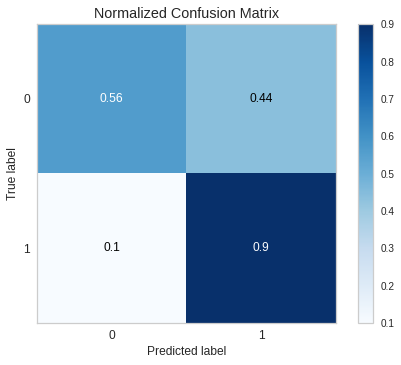

In [ ]:
# instanciando o modelo
ml_model = XGBClassifier(learning_rate=0.001 , n_estimators=50, max_depth=1, min_child_weight=1, gamma=0.0)

# treinando o modelo
ml_model.fit(X_train, y_train)

# fazer a previsão
X_test = scaler.transform(X_test)
y_pred = ml_model.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# plotar matriz de confusão
plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

Os dados de testes não haviam sido passados para o modelo ainda. No entanto, ele manteve um desempenho próximo àquele estimado anteriormente, graças a um bom trabalho de otimização nos parâmetros.

Ainda há espaço para se tentar outras técnicas de balanceamento de dados e também técnicas de machine learning como feature engineering e feature selection.

Na próxima etapa deste estudo foram elaboradas visualizações de pontuação do regressor que exibem as instâncias no espaço do modelo para entender melhor como o modelo está fazendo as previsões.

# Finalizando o modelo

**Análize dos dados gerado pelo modelo**

Aqui podemos visualizar tanto os dados gerados pelo modelo de regressão desenvolvido neste estudo como os dados reais de custo do seguro de vida do nosso *dataset* original. Neste *dataframe* conseguimos fazer uma comparação visual destes dados.

In [ ]:
# gerando novo dataframe de output comparativo
output = pd.DataFrame({'predict_charges': y_pred, 'real_charges': y_test})
output

,predict_charges,real_charges
4213,1,1
5035,1,0
3713,1,1
1720,1,0
234,1,0
...,...,...
1207,1,0
3809,0,0
6196,0,0
6092,0,0


**Salvando o Modelo**

Agora que terminamos nosso trabalho com o modelo, é hora de se preocupar em como mantê-lo utilizável e pronto para fazer novas previsões em novos dados.

Com a função `joblib.dump` conseguimos salvar o nosso modelo treinado, pronto para uso. Dentro dele também está contido todo o pipeline de pré-processamento que foi utilizado. Basta passar o conjunto de dados para fazer as previsões.

In [ ]:
# salvando o modelo como um pickle em um arquivo
joblib.dump(ml_model, 'ml_model_prediction.pkl')

['ml_model_prediction.pkl']

**Carregando um Modelo**

Com o modelo carregado, é fácil fazer novas previsões com ele, assim como fizemos ao finalizar nosso modelo.

Para isso, vamos utilizar o método `load_model`, passando como parâmetro o nome do arquivo do modelo.

In [ ]:
# carregando o modelo do arquivo
ml_model_from_joblib = joblib.load('ml_model_prediction.pkl')
 
# usando o modelo carregado para fazer predições
ml_model_from_joblib.predict(X_test)

array([1, 1, 1, ..., 0, 0, 1])